In [269]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [270]:
# Прочитайте таблицю з файлу "2017_jun_final.csv" 
df = pd.read_csv("bestsellers_with_categories.csv")

In [271]:
# Прочитайте отриману таблицю, використовуючи метод head
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [272]:
#Підправимо назви змінних
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [273]:
#Враховуємо тільки унікальні книги
df_unique = df.drop_duplicates(subset='name')
df_unique

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
538,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,10760,15,2012,Fiction
539,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,2010,Non Fiction
540,Wonder,R. J. Palacio,4.8,21625,9,2013,Fiction
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction


In [274]:
#Виведіть розміри датасету (використовуйте атрибут shape)
df_unique.shape[0]

351

In [275]:
#Про скільки книг зберігає дані датасет?
# Відповідь: про 351 книгу

In [276]:
#Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
df.isna().sum()


name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [277]:
    #Відповідь: Чи є в якихось змінних пропуски? (ні)

In [278]:
#Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
df_unique['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

In [279]:
#Відповідь: Які є унікальні жанри? Non Fiction та Fiction

<Axes: >

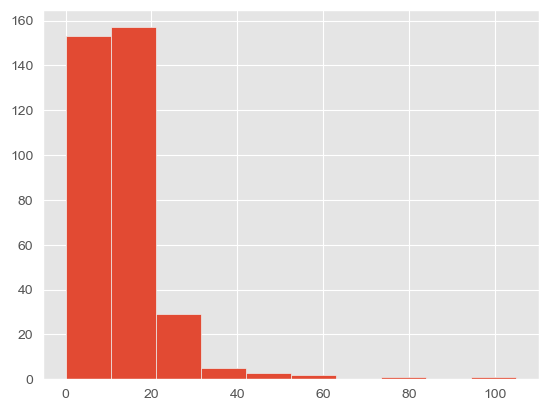

In [280]:
#Подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
df_unique['price'].hist()

In [281]:
#Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

max_price = df_unique['price'].max()
print("Максимальна ціна:", max_price)

min_price = df_unique['price'].min()
print("Мінімальна ціна:", min_price)

mean_price = df_unique['price'].mean().round(2)
print("Середня ціна:", mean_price)

median_price = df_unique['price'].median()
print("Медіанна ціна:", median_price)

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.08
Медіанна ціна: 12.0


In [282]:
#Відповідь: Який рейтинг у датасеті найвищий?

high_rating = df_unique['user_rating'].max()
print("Найвищий рейтинг:", high_rating)


Найвищий рейтинг: 4.9


In [283]:
#Скільки книг мають найвищій рейтинг?

high_rating_count = len(df_unique[df_unique['user_rating'] == high_rating])
print("Кількість книг з найвищим рейтингом:", high_rating_count)

Кількість книг з найвищим рейтингом: 28


In [284]:
#Яка книга має найбільше відгуків?

# Знаходимо максимальну кількість відгуків
max_reviews = df_unique['reviews'].max()

# Знаходимо індекс книги з найбільшою кількістю відгуків
index_of_max_reviews = df_unique['reviews'].idxmax()

# Отримуємо назву книги з найбільшою кількістю відгуків
book_with_max_reviews = df_unique.loc[index_of_max_reviews, 'name']

print("Кількість відгуків:", max_reviews)
print("Книга з найбільшою кількістю відгуків:", book_with_max_reviews)

Кількість відгуків: 87841
Книга з найбільшою кількістю відгуків: Where the Crawdads Sing


In [285]:
#З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? 

# top50_2015
df_top50_2015 = df_unique[df_unique['year'] == 2015]

# Знайти книгу з найбільшою ціною в df_top50_2015
max_price_book = df_top50_2015[df_top50_2015['price'] == df_top50_2015['price'].max()]

# Назва книги з найбільшою ціною
print("Найдорожча книга з Топ-50 2015 року:", max_price_book['name'].values[0])

Найдорожча книга з Топ-50 2015 року: Go Set a Watchman: A Novel


In [286]:
#Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? 

# Фільтруємо DataFrame за двома умовами: жанр Fiction і рік 2010
fiction_books_2010 = df_unique[(df_unique['genre'] == 'Fiction') & (df_unique['year'] == 2010)]

# Рахуємо кількість книг, які задовольняють обом умовам
count_fiction_books_2010 = fiction_books_2010.shape[0]

print("Кількість книг жанру Fiction, що потрапили до Топ-50 у 2010 році:", count_fiction_books_2010)

Кількість книг жанру Fiction, що потрапили до Топ-50 у 2010 році: 17


In [287]:
#Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?
# Фільтруємо DataFrame за умовою рейтингу 4.9 і рік відповідно до 2010 та 2011
books_4_9_2010_2011 = df_unique[(df_unique['user_rating'] == 4.9) & (df_unique['year'].isin([2010, 2011]))]

# Рахуємо кількість книг, які задовольняють умовам
count_books_4_9_2010_2011 = books_4_9_2010_2011.shape[0]

print(f"Кількість книг з рейтингом 4.9, що потрапили до рейтингу у 2010 та 2011 роках: {count_books_4_9_2010_2011}")

Кількість книг з рейтингом 4.9, що потрапили до рейтингу у 2010 та 2011 роках: 1


In [288]:
#Відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values)

# Фільтруємо DataFrame за двома умовами: рік 2015 і ціна менше за 8 доларів
cheap_books_2015 = df_unique[(df_unique['year'] == 2015) & (df_unique['price'] < 8)]

# Сортуємо за зростанням ціни
cheap_books_2015_sorted = cheap_books_2015.sort_values('price')

print("Книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів:")
print(cheap_books_2015_sorted)

Книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів:
                                                  name              author  \
54   Creative Haven Creative Cats Coloring Book (Ad...     Marjorie Sarnat   
123                               Giraffes Can't Dance       Giles Andreae   
28                        Baby Touch and Feel: Animals                  DK   
55   Creative Haven Owls Coloring Book (Adult Color...     Marjorie Sarnat   
63                      Dear Zoo: A Lift-the-Flap Book        Rod Campbell   
89   Dover Creative Haven Art Nouveau Animal Design...         Marty Noble   
201  Killing Reagan: The Violent Assault That Chang...       Bill O'Reilly   
16   Adult Coloring Book: Stress Relieving Animal D...  Blue Star Coloring   
17      Adult Coloring Book: Stress Relieving Patterns  Blue Star Coloring   
253              Old School (Diary of a Wimpy Kid #10)         Jeff Kinney   

     user_rating  reviews  price  year        genre  
54       

In [289]:
#Яка книга остання у відсортованому списку? 
#Відповідь:Old School (Diary of a Wimpy Kid #10) 

In [290]:
#Подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min).
# Групуємо дані за жанром і застосовуємо агрегатні функції max та min до стовпця 'price'
price_by_genre = df_unique.groupby('genre')['price'].agg(['min', 'max'])

print(price_by_genre)

             min  max
genre                
Fiction        0   82
Non Fiction    0  105


In [291]:
#Максимальна ціна для жанру Fiction: 
# Відповідь: 82

In [292]:
#Мінімальна ціна для жанру Fiction: 
# Відповідь: 0  

In [293]:
#Максимальна ціна для жанру Non Fiction:
# Відповідь: 105

In [294]:
#Мінімальна ціна для жанру Non Fiction:
# Відповідь: 0  

In [295]:
#Cтворіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). 

# Групуємо дані за автором і застосовуємо агрегатну функцію count до стовпця 'name'
books_by_author = df_unique.groupby('author')['name'].count().reset_index()

# Перейменовуємо стовпець 'count' на 'number of books'
books_by_author.rename(columns={'name': 'number of books'}, inplace=True)

print(books_by_author)

                         author  number of books
0              Abraham Verghese                1
1                Adam Gasiewski                1
2                 Adam Mansbach                1
3                     Adir Levy                1
4    Admiral William H. McRaven                1
..                          ...              ...
243             Walter Isaacson                2
244               William Davis                1
245            William P. Young                1
246            Wizards RPG Team                1
247                Zhi Gang Sha                2

[248 rows x 2 columns]


In [296]:
#Якої розмірності вийшла таблиця? 

# Відповідь: [248 rows x 2 columns]

In [297]:
#Який автор має найбільше книг?

# Знаходимо автора з найбільшою кількістю книг
author_with_most_books = books_by_author.loc[books_by_author['number of books'].idxmax(), 'author']
print("Автор з найбільшою кількістю книг:", author_with_most_books)

Автор з найбільшою кількістю книг: Jeff Kinney


In [298]:
#Скільки книг цього автора? 

author_name = "Jeff Kinney"

# Знаходимо кількість книг для цього автора
number_of_books = books_by_author.loc[books_by_author['author'] == "Jeff Kinney", 'number of books'].values[0]
print("Кількість книг автора", author_name, ":", number_of_books)

Кількість книг автора Jeff Kinney : 12


In [299]:
#Створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). 

# Групуємо дані за автором і застосовуємо агрегатну функцію mean 
ratings_by_author = df_unique.groupby('author')['user_rating'].agg('mean').reset_index()

print(ratings_by_author)

                         author  user_rating
0              Abraham Verghese         4.60
1                Adam Gasiewski         4.40
2                 Adam Mansbach         4.80
3                     Adir Levy         4.80
4    Admiral William H. McRaven         4.70
..                          ...          ...
243             Walter Isaacson         4.55
244               William Davis         4.40
245            William P. Young         4.60
246            Wizards RPG Team         4.80
247                Zhi Gang Sha         4.60

[248 rows x 2 columns]


In [300]:
#У якого автора середній рейтинг мінімальний?

# Знаходимо автора з мінімальним середнім рейтингом
author_with_min_rating = ratings_by_author.loc[ratings_by_author['user_rating'].idxmin(), 'author']

print("Автор з мінімальним середнім рейтингом:", author_with_min_rating)

Автор з мінімальним середнім рейтингом: Donna Tartt


In [301]:
#Який у цього автора середній рейтинг? 

author_name = "Donna Tartt"

# Знаходимо середній рейтинг для цього автора
average_rating = ratings_by_author.loc[ratings_by_author['author'] == author_name, 'user_rating'].values[0]

print("Середній рейтинг автора", author_name, ":", average_rating)

Середній рейтинг автора Donna Tartt : 3.9


In [302]:
#З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну)

# Об'єднуємо DataFrame books_by_author і ratings_by_author по горизонталі
combined_df = pd.concat([books_by_author, ratings_by_author['user_rating']], axis=1)

print(combined_df)

                         author  number of books  user_rating
0              Abraham Verghese                1         4.60
1                Adam Gasiewski                1         4.40
2                 Adam Mansbach                1         4.80
3                     Adir Levy                1         4.80
4    Admiral William H. McRaven                1         4.70
..                          ...              ...          ...
243             Walter Isaacson                2         4.55
244               William Davis                1         4.40
245            William P. Young                1         4.60
246            Wizards RPG Team                1         4.80
247                Zhi Gang Sha                2         4.60

[248 rows x 3 columns]


In [303]:
#Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

# Відсортуємо DataFrame combined_df за зростаючою кількістю книг та зростаючим рейтингом
sorted_df = combined_df.sort_values(by=['number of books', 'user_rating'], ascending=[True, True])

print(sorted_df)

              author  number of books  user_rating
71       Donna Tartt                1     3.900000
90            Gallup                1     4.000000
100    Gillian Flynn                1     4.000000
171   Muriel Barbery                1     4.000000
43      Chris Cleave                1     4.100000
..               ...              ...          ...
27     Bill O'Reilly                6     4.633333
58        Dav Pilkey                6     4.900000
221  Stephenie Meyer                7     4.657143
197     Rick Riordan               10     4.770000
120      Jeff Kinney               12     4.800000

[248 rows x 3 columns]


In [304]:
# Знаходимо ім'я першого автора у відсортованому DataFrame
first_author = sorted_df.iloc[0, 0]

print("Перший автор у списку:", first_author)

Перший автор у списку: Donna Tartt


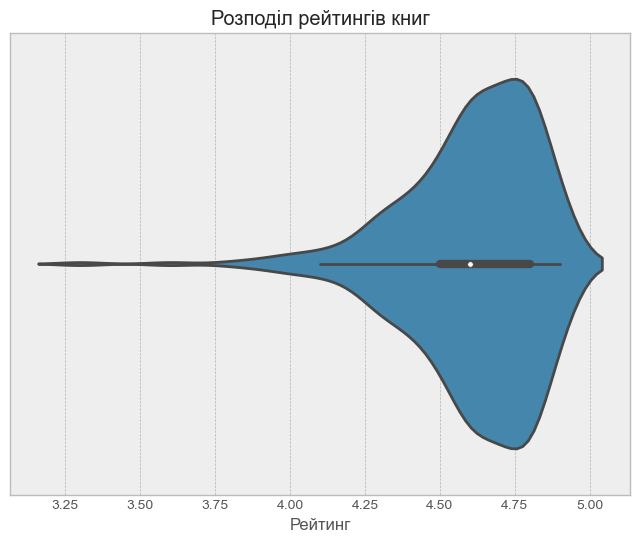

In [316]:
%matplotlib inline

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')

plt.figure(figsize=(8, 6))
sns.violinplot(x=df_unique['user_rating'])
plt.xlabel('Рейтинг')
plt.title('Розподіл рейтингів книг')
plt.show()

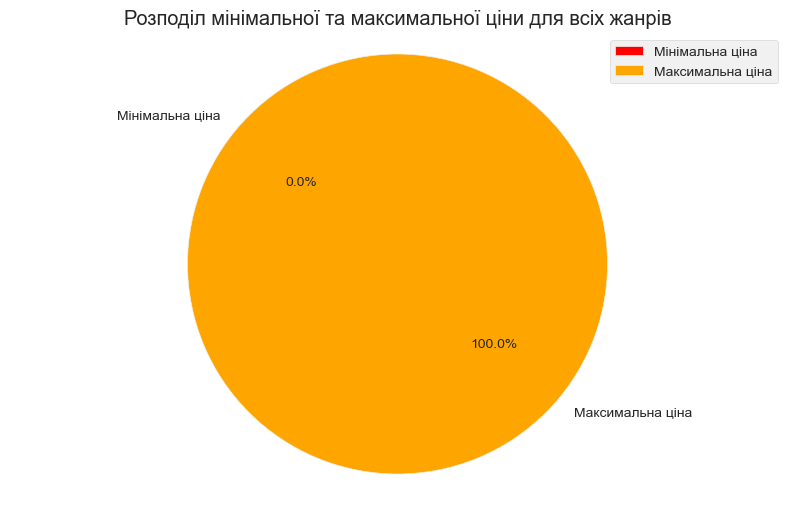

In [315]:
%matplotlib inline
min_prices = price_by_genre['min']
max_prices = price_by_genre['max']
plt.figure(figsize=(10, 6))
plt.pie([min_prices.sum(), max_prices.sum()], labels=['Мінімальна ціна', 'Максимальна ціна'], autopct='%1.1f%%', startangle=140, colors=['red', 'orange'])
plt.title('Розподіл мінімальної та максимальної ціни для всіх жанрів')
plt.axis('equal') 
plt.legend(loc='upper right')
plt.show()

C:\Users\PDS\anaconda3\envs\Data_Science\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PDS\anaconda3\envs\Data_Science\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\PDS\anaconda3\envs\Data_Science\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\PDS\anaconda3\envs\Data_Science\Lib\site-packages\s

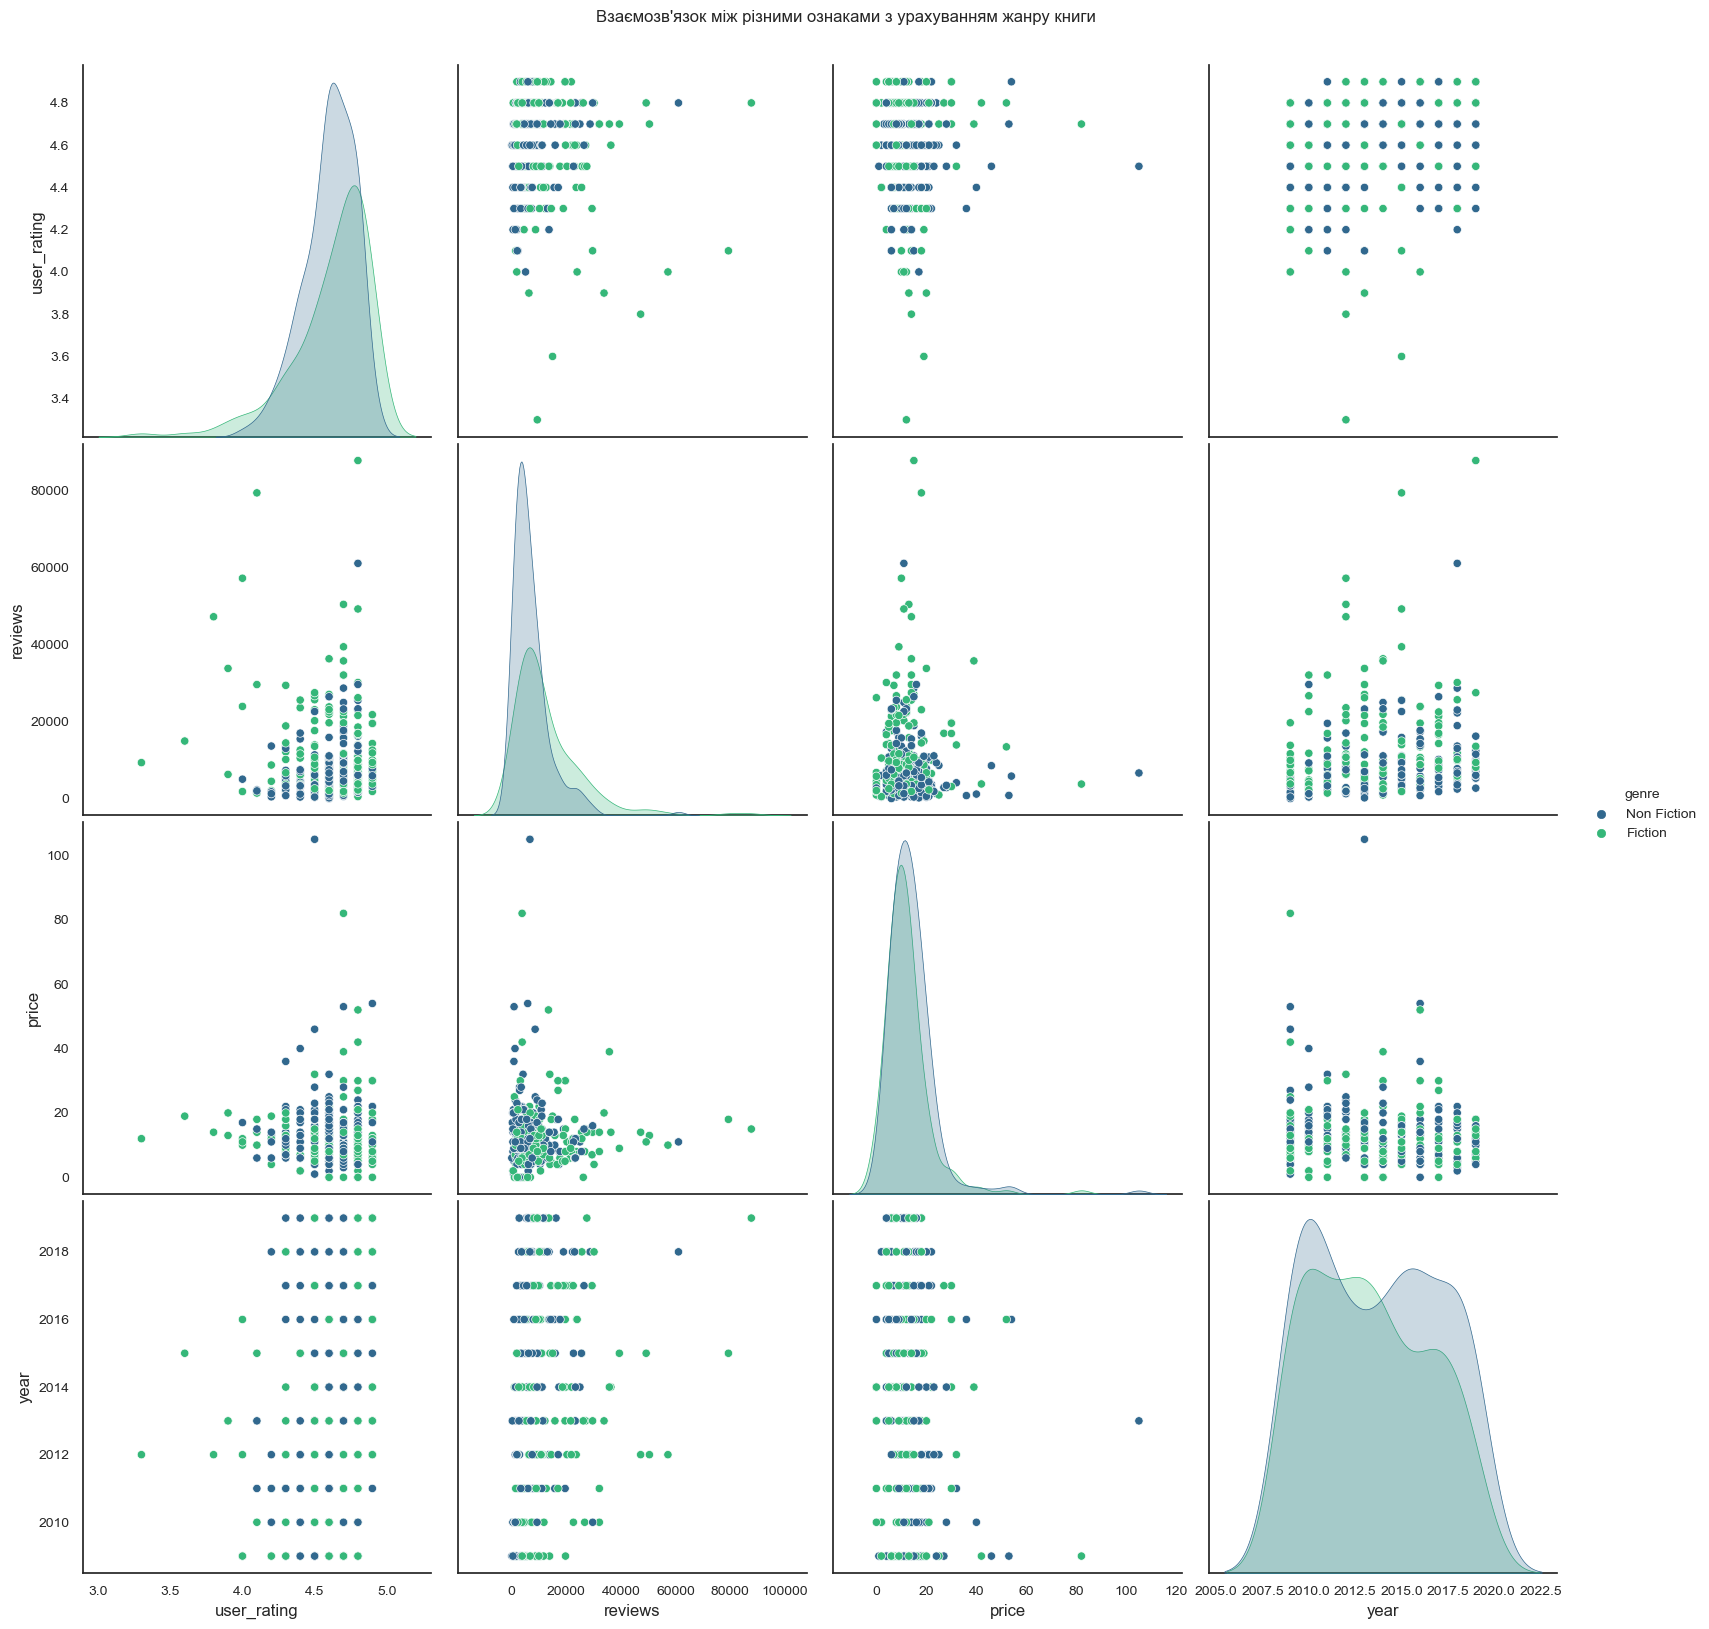

In [337]:
%matplotlib inline
sns.pairplot(df_unique, hue='genre', palette='viridis', diag_kind='kde', height=4)
plt.suptitle('Взаємозв\'язок між різними ознаками з урахуванням жанру книги', y=1.02)
plt.show()